<a href="https://colab.research.google.com/github/Loga19818eeanvesh/Natural_Language_Processing_Sequence_Models_Assignments/blob/main/tf_c3w2_a1_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# bbc-text.csv
!gdown --id 1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj

Downloading...
From: https://drive.google.com/uc?id=1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj
To: /content/bbc-text.csv
100% 5.06M/5.06M [00:00<00:00, 25.3MB/s]


In [2]:
vocab_size = 10000
embedding_dim = 64
max_length = 128
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<UNK>'
training_portion = .8


In [3]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [5]:
with open("./bbc-text.csv", 'r') as csvfile:
    ### START CODE HERE
    csvreader = csv.reader(csvfile)
    next(csvreader)
    for row in csvreader:
      labels.append(row[0])
      sentence = row[1]
      for word in stopwords:
        token = " "+word+" "
        sentence = sentence.replace(token, " ")
      sentence = sentence.replace("  ", " ")
      sentences.append(sentence)
    ### END CODE HERE

    
print(len(labels))
print(len(sentences))
print(sentences[0])

2225
2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cab

In [7]:
train_size = int(training_portion*len(sentences))

train_sentences = sentences[0:train_size]
train_labels = labels[0:train_size]

validation_sentences = sentences[train_size:len(sentences)]
validation_labels = labels[train_size:len(sentences)]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [21]:
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

#
vocab_size = len(word_index)+1
#

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type , maxlen=max_length,truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))


449
128
200
128
192
128


In [9]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences,padding=padding_type , maxlen=max_length,truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 128)


In [18]:
from tensorflow.python.framework.dtypes import DType
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)
label_word_index = label_tokenizer.word_index

no_of_labels = len(label_word_index)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels),dtype=int)
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels),dtype=int)

training_label_seq = [l-1 for l in training_label_seq]
training_label_seq = np.array(training_label_seq)

validation_label_seq = [l-1 for l in validation_label_seq]
validation_label_seq = np.array(validation_label_seq)

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[1]
[0]
(1780, 1)
[3]
[4]
[2]
(445, 1)


In [22]:
model = tf.keras.Sequential([
# YOUR CODE HERE
tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(no_of_labels, activation='sigmoid')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 128, 64)           1746304   
                                                                 
 global_average_pooling1d_2   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 1,750,789
Trainable params: 1,750,789
Non-trainable params: 0
_________________________________________________________________


In [23]:
num_epochs = 30
history = model.fit(train_padded , training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq))

Epoch 1/30
56/56 [==============================] - 2s 23ms/step - loss: 1.5559 - accuracy: 0.4101 - val_loss: 1.4374 - val_accuracy: 0.5685
Epoch 2/30
56/56 [==============================] - 1s 21ms/step - loss: 1.1417 - accuracy: 0.7708 - val_loss: 0.8611 - val_accuracy: 0.8607
Epoch 3/30
56/56 [==============================] - 1s 21ms/step - loss: 0.5106 - accuracy: 0.9618 - val_loss: 0.3882 - val_accuracy: 0.9506
Epoch 4/30
56/56 [==============================] - 1s 20ms/step - loss: 0.1669 - accuracy: 0.9921 - val_loss: 0.2171 - val_accuracy: 0.9640
Epoch 5/30
56/56 [==============================] - 1s 20ms/step - loss: 0.0644 - accuracy: 0.9978 - val_loss: 0.1633 - val_accuracy: 0.9618
Epoch 6/30
56/56 [==============================] - 1s 20ms/step - loss: 0.0320 - accuracy: 0.9994 - val_loss: 0.1415 - val_accuracy: 0.9596
Epoch 7/30
56/56 [==============================] - 1s 22ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.1301 - val_accuracy: 0.9618
Epoch 8/30
56

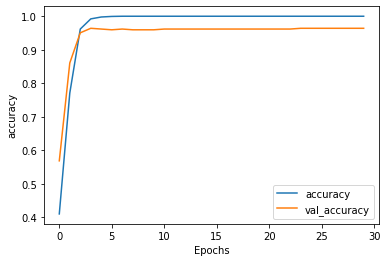

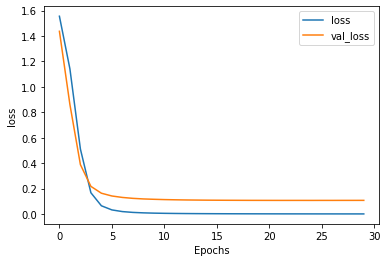

In [26]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [27]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [28]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights)

[[ 0.04827429  0.11053801 -0.07824164 ... -0.06027026  0.00559979
   0.00581085]
 [-0.00285435 -0.01971315  0.00041296 ...  0.00765764 -0.0497453
  -0.02991735]
 [-0.09755986 -0.13628723 -0.08661238 ... -0.1326905   0.03239689
  -0.16085318]
 ...
 [ 0.03712679 -0.01264701  0.02118385 ...  0.01304001  0.00842585
   0.03866676]
 [-0.02398468 -0.02770779 -0.01306698 ...  0.01916304  0.04781172
  -0.00849801]
 [ 0.01144506 -0.03270574 -0.00947078 ...  0.0389192   0.03426399
  -0.06082116]]


obtained 96.4% validation_accuracy